# The Artificial Neural Network Algorithm (predicting part)

## 1. Import packages 

In [9]:
import time
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.impute import SimpleImputer as SI

## 2. Data uploading and preprocessing

Upload the training and testing data from .csv files

In [2]:
data = pd.read_csv("new_data.csv")
Test = pd.read_csv("test_set.csv")

Then, remove features that are irrelevent to the game result and normalize the remaining attributes' values 

In [3]:
SI = SI()
scaler = MMS(feature_range=(0,1))
X = data.drop(['gameDuration','gameId','seasonId','creationTime','winner'],axis=1).values#delete the meaningless features
#X = SI.fit_transform(X)
#X = scaler.fit_transform(X)
X_test = Test.drop(['gameDuration','gameId','seasonId','creationTime','winner'],axis=1).values
#X_test = SI.fit_transform(X_test)
#X_test = scaler.fit_transform(X_test)
y = data['winner'] - 1# extract the standard training result
y_test = Test["winner"] - 1


X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)
X_train = torch.FloatTensor(X)
y_train = torch.LongTensor(y)# transform the training set into tensor type

## 3. Model defining and training

Define the ANN class and instantiate it.

In [4]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_1 = nn.Linear(in_features=16,out_features=17)#in_features = number of features
        self.output = nn.Linear(in_features=17,out_features=2)#out_features = kinds of output
    def forward(self,x):
        x = torch.sigmoid(self.hidden_1(x))
        x = self.output(x)
        x = F.softmax(x,dim=1)
        return x
model = ANN()

Define the cost function and optimize function with learning rate 0.46

In [5]:
cost = nn.CrossEntropyLoss()
back_propagation = torch.optim.Adam(model.parameters(),lr=0.19)

Training the model in 100 loops and make a prediction at the same time.

In [10]:
time_1 = time.time()
epochs = 100
accuracies = []
index = []
errors = []
for i in range(epochs):
    y_hat = model.forward(X_train)
    error = cost(y_hat,y_train)
    errors.append(error)
    predict = model(X_test)
    _,predict_y = torch.max(predict,1)
    accuracy = accuracy_score(y_test,predict_y)
    accuracies.append(accuracy)
    back_propagation.zero_grad()
    error.backward()
    back_propagation.step()
    index.append(i)
time_2 = time.time()

## 4. Prediction result

In [11]:
diff_time = time_2-time_1
diff_time

4.108757972717285

0.9669192655202565

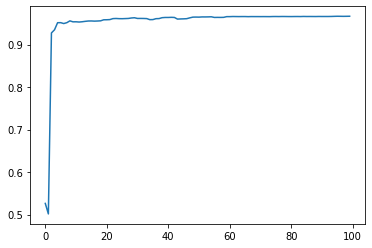

In [7]:
#plt.ylim(0.96,0.97)
plt.plot(index[:],accuracies[:])
np.max(accuracies[:])